In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from dimod.reference.samplers import ExactSolver,SimulatedAnnealingSampler
from rdkit import DataStructs


from QChem_v4_5_tox import MolGraph,ConflictGraph

import networkx as nx
import numpy as np
from PIL import Image

## Phenacetin

Phenacetin is a pain-relieving and fever-reducing drug, which was widely used following its introduction in 1887. Phenacetin was widely used until the third quarter of the twentieth century, often in the form of an A.P.C., or "*aspirin-phenacetin-caffeine*" compound analgesic, as a remedy for fever and pain. 

In the United States, the Food and Drug Administration ordered the withdrawal of drugs containing phenacetin in November 1983, due to its _**carcinogenic and kidney-damaging properties**_.

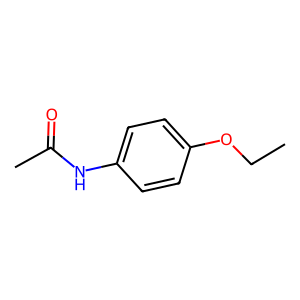

In [2]:
with Chem.SDMolSupplier('phenactin.sdf') as suppl:
    phenacetin = [mol for mol in suppl][0]

Draw.MolToImage(phenacetin) 

### Finding drug having similar activity of Phenacetin

Consider two molecules:

1. Molecule where the ethoxy group (OCH2CH3) in Phenacetin is replaced with the Hydroxyl group (OH).
 2. Molecule where the ethoxy group (OCH2CH3) in Phenacetin is replaced with the Bromoethyl group (OCH2CH2Br).

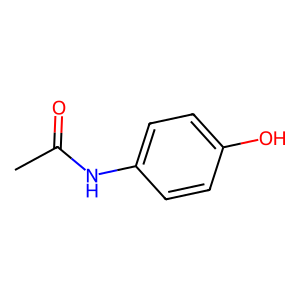

In [3]:
# molecule -1 

with Chem.SDMolSupplier('MOL_P.sdf') as suppl:
    mol1 = [mol for mol in suppl][0]

Draw.MolToImage(mol1) 

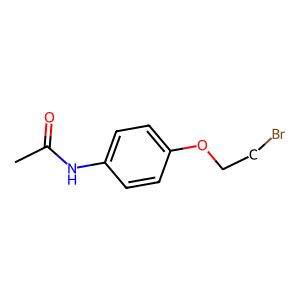

In [4]:
# molecule -2

with Chem.SDMolSupplier('mol2.sdf') as suppl:
    mol2 = [mol for mol in suppl][0]

image = Draw.MolToImage(mol2) 
image_array = np.array(image)
pil_image = Image.fromarray(image_array)
rotated_image = pil_image.rotate(90)
rotated_image


image


<span style='font-family:Georgia'> 
<span style='color: Black'> 


<font size ="5">
 
 Simply by looking we would arrive at the conclusion that **Molecule 2** is more similar to Phenacetin and thus would have similar activity. The **Molecule 2** is called *N-[4-(2-Bromo-ethoxy)-phenyl]-acetamide*.
- But on careful analysis we can see that the **Molecule 2**  because of the presence of $\beta$-Haloethoxy group (OCH2CH2Br),the molecule 2 have a toxic effect and hence it is **not a FDA Approved Drug**. 

- In the other hand, the **Molecule 1** is the well known **Paracetamol**, that share same activity as of Phenacetin.

</font>



### Finding the Similarity between the Molecules using Fingerprint Method

In [5]:
# Generating Morgan FingerPrint

fpgen = AllChem.GetMorganGenerator(radius=2)

mfp1 = fpgen.GetSparseCountFingerprint(phenacetin)

mfp2 = fpgen.GetSparseCountFingerprint(mol1)
mfp3 = fpgen.GetSparseCountFingerprint(mol2)

In [6]:
# Similarity between Phenacetin and Paracetamol

DataStructs.TanimotoSimilarity(mfp1,mfp2) 

0.5714285714285714

In [7]:
# Similarity between Phenacetin and  N-[4-(2-Bromo-ethoxy)-phenyl]-acetamid

DataStructs.TanimotoSimilarity(mfp1,mfp3) 

0.7045454545454546

In [8]:
# Generating Torsion FingerPrint

fpgen = AllChem.GetTopologicalTorsionGenerator()

tfp1 = fpgen.GetSparseCountFingerprint(phenacetin)
tfp2 = fpgen.GetSparseCountFingerprint(mol1)
tfp3 = fpgen.GetSparseCountFingerprint(mol2)

In [9]:
# Similarity between Phenacetin and Paracetamol

DataStructs.TanimotoSimilarity(tfp1,tfp2) 

0.631578947368421

In [10]:
# Similarity between Phenacetin and  N-[4-(2-Bromo-ethoxy)-phenyl]-acetamide

DataStructs.TanimotoSimilarity(tfp1,tfp3) 

0.8421052631578947

### Finding the Similarity between the Molecules using Graph Molecular Similarity Method

In [11]:
molgraph_obj_1 = MolGraph(phenacetin)
molgraph_obj_2 = MolGraph(mol1)
molgraph_obj_3 = MolGraph(mol2)

In [12]:
G1,G1_properties,G1d = molgraph_obj_1.get_mol_graph()
G2,G2_properties,G2d = molgraph_obj_2.get_mol_graph()

# conformer graph
G3,G3_properties,G3d = molgraph_obj_3.get_mol_graph()

In [13]:
critical_labels =  {'atomic_number_atom','Donor','Acceptor','Aromatic','Hydrophobe','ZnBinder','Acidic','Basic'}
off_labels = {'ring_atoms','coords','symbol', 'distances','ring_size'}
label_weights = {'ring':0,'ring_size': 0, 'ring_atoms': 1, 'atomic_number_atom': 1, 'atomic_number_ring': 5, 'implicit_hydrogen': 1, 'formal_charge': 1,
                             'degree': 1, 'bond_order': 1, 'distances': 1, 'coords': 1, 'symbol': 1,'Donor':2, 'Acceptor': 2, 'Aromatic': 2, 'Hydrophobe':1, 'ZnBinder': 3,'Acidic':3,'Basic':3,'Toxicophore':10}

In [14]:
ConflictGraph_Obj_1 = ConflictGraph(G1, G2, G1d, G2d, label_weights, critical_labels, off_labels)

In [15]:
# Similarity between Phenacetin and Paracetamol

ConflictGraph_Obj_1.get_weighted_sim_score()

0.8144094847241222

In [16]:
# Similarity between Phenacetin and  N-[4-(2-Bromo-ethoxy)-phenyl]-acetamide
ConflictGraph_Obj_2 = ConflictGraph(G1, G3, G1d, G3d, label_weights, critical_labels, off_labels)

In [17]:
ConflictGraph_Obj_2.get_weighted_sim_score()

0.7822765469824293

In [18]:
Gc1 = ConflictGraph_Obj_1.create_conflict_graph(dt=1.5)
Gc2 = ConflictGraph_Obj_2.create_conflict_graph(dt=1.5)

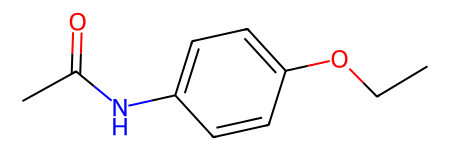

In [19]:
phenacetin

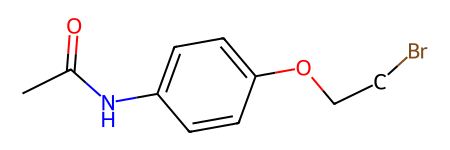

In [20]:
mol2

In [21]:
G3.nodes[0]

{'atomic_number_atom': 35,
 'implicit_hydrogen': 0,
 'formal_charge': 0,
 'degree': 1,
 'bond_order': {1.0: 1},
 'symbol': 'Br',
 'Toxicophore': True}

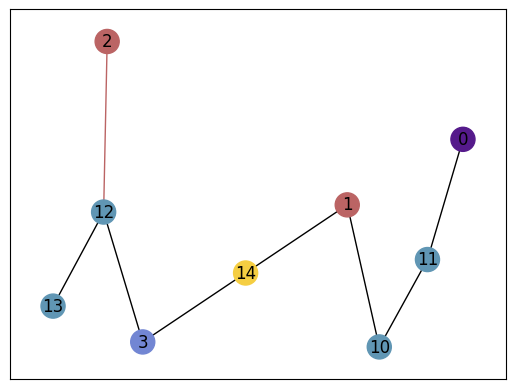

In [22]:
import networkx as nx
nx.draw_networkx(G3,pos=G3_properties[0],node_color=G3_properties[1],edge_color = G3_properties[2],with_labels=True)

In [23]:
fpgen = AllChem.GetMorganGenerator(radius=2)
mfp1 = fpgen.GetSparseCountFingerprint(phenacetin)
with Chem.SDMolSupplier('Database.sdf') as suppl:
        mols = [mol for mol in suppl]

output_dict = {}
for mol in mols:
    mfp2 = fpgen.GetSparseCountFingerprint(mol)
    print('Molecule ID : ',mol.GetProp('_Name'),"similarity score:",DataStructs.TanimotoSimilarity(mfp1,mfp2)) 
    output_dict[mol.GetProp('_Name')] = DataStructs.TanimotoSimilarity(mfp1,mfp2)

Molecule ID :  1983 similarity score: 0.5714285714285714
Molecule ID :  3672 similarity score: 0.26666666666666666
Molecule ID :  2337 similarity score: 0.35294117647058826
Molecule ID :  4914 similarity score: 0.27692307692307694
Molecule ID :  9076 similarity score: 0.5238095238095238
Molecule ID :  403 similarity score: 0.20833333333333334
Molecule ID :  7495 similarity score: 0.5
Molecule ID :  19266 similarity score: 0.5106382978723404
Molecule ID :  76024 similarity score: 0.23728813559322035
Molecule ID :  11364 similarity score: 0.24528301886792453
Molecule ID :  12107 similarity score: 0.34
Molecule ID :  11959 similarity score: 0.2641509433962264
Molecule ID :  94921 similarity score: 0.19672131147540983
Molecule ID :  6483715 similarity score: 0.7045454545454546
Molecule ID :  11615857 similarity score: 0.3387096774193548


In [24]:
Ranked_dict = dict(sorted(output_dict.items(), key=lambda item: item[1],reverse=True))

print([keys for keys in Ranked_dict])

['6483715', '1983', '9076', '19266', '7495', '2337', '12107', '11615857', '4914', '3672', '11959', '11364', '76024', '403', '94921']


# Toxicophore based ranking

In [25]:
with Chem.SDMolSupplier('phenactin.sdf') as suppl:
        mol = [mol for mol in suppl][0]
molgraph_obj_1 = MolGraph(mol)
G1,G1_properties,G1d = molgraph_obj_1.get_mol_graph()

In [26]:
critical_labels = {'atomic_number_atom','Donor','Acceptor','Aromatic','Hydrophobe','ZnBinder','Acidic','Basic','Toxic'}
off_labels = {'ring_atoms','coords','symbol', 'distances','ring_size'}
label_weights = {'ring':0,'ring_size': 0, 'ring_atoms': 1, 'atomic_number_atom': 1, 'atomic_number_ring': 5, 'implicit_hydrogen': 0, 'formal_charge': 1,
                             'degree': 1, 'bond_order': 1, 'distances': 1, 'coords': 1, 'symbol': 1,'Donor':3, 'Acceptor': 3, 'Aromatic': 2, 'Hydrophobe':3, 'ZnBinder': 1,'Acidic':2,'Basic':2,'Toxicophore':5}

In [27]:
with Chem.SDMolSupplier('Database_3d.sdf') as suppl:
        mol1 = [mol for mol in suppl]

output_dict={}
for i in range(15):
    molgraph_obj_2 = MolGraph(mol1[i])

    G2,G2_properties,G2d = molgraph_obj_2.get_mol_graph()
    ConflictGraph_Obj_1 = ConflictGraph(G1, G2, G1d, G2d, label_weights, critical_labels, off_labels)
    print('Molecule ID:', molgraph_obj_2.mol.GetProp('_Name'),"similarity score:",ConflictGraph_Obj_1.get_weighted_sim_score())
    output_dict[molgraph_obj_2.mol.GetProp('_Name')]=ConflictGraph_Obj_1.get_weighted_sim_score()

    

Molecule ID: 1983 similarity score: 0.8303287380699894
Molecule ID: 3672 similarity score: 0.4536613272311213
Molecule ID: 2337 similarity score: 0.5788537549407115
Molecule ID: 4914 similarity score: 0.46222826086956526
Molecule ID: 9076 similarity score: 0.6688759278897136
Molecule ID: 403 similarity score: 0.47041062801932365
Molecule ID: 7495 similarity score: 0.5741459627329193
Molecule ID: 19266 similarity score: 0.7053511705685619
Molecule ID: 76024 similarity score: 0.5530936454849499
Molecule ID: 11364 similarity score: 0.6358695652173914
Molecule ID: 12107 similarity score: 0.6967963386727689
Molecule ID: 11959 similarity score: 0.6967963386727689
Molecule ID: 94921 similarity score: 0.37868162692847124
Molecule ID: 6483715 similarity score: 0.8274672187715666
Molecule ID: 11615857 similarity score: 0.5001144164759725


In [28]:
Ranked_dict = dict(sorted(output_dict.items(), key=lambda item: item[1],reverse=True))

print([keys for keys in Ranked_dict])

['1983', '6483715', '19266', '12107', '11959', '9076', '11364', '2337', '7495', '76024', '11615857', '403', '4914', '3672', '94921']


In [29]:
molgraph_obj_2 = MolGraph(mol1[-2])

G2,G2_properties,G2d = molgraph_obj_2.get_mol_graph()
G2.nodes[11]

{'atomic_number_atom': 6,
 'implicit_hydrogen': 2,
 'formal_charge': 0,
 'degree': 2,
 'bond_order': {1.0: 2},
 'symbol': 'C',
 'Hydrophobe': True,
 'Toxicophore': True}

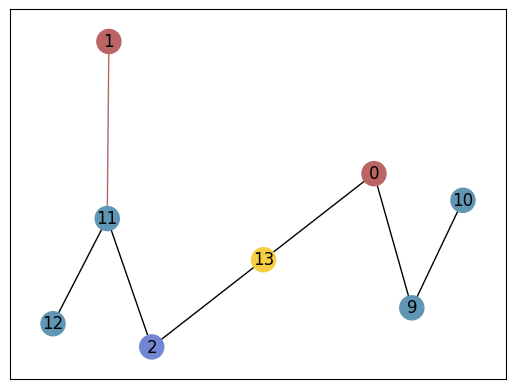

In [30]:
import networkx as nx
nx.draw_networkx(G1,pos=G1_properties[0],node_color=G1_properties[1],edge_color = G1_properties[2],with_labels=True)

In [31]:
G1,G1_properties,G1d = molgraph_obj_1.get_mol_graph()
G1.nodes[10]

{'atomic_number_atom': 6,
 'implicit_hydrogen': 3,
 'formal_charge': 0,
 'degree': 1,
 'bond_order': {1.0: 1},
 'symbol': 'C'}